# Geração do Quadro 6

# Treinamentos de Detecção de Anomalias para geração de matriz de confusão sem exclusão de extremos

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','f1','fn','fp','tp'])
print(tabelafinal)
novatabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','f1','fn','fp','tp'])
print(tabelafinal)
tabelafinalrecall = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','f1','fn','fp','tp'])
print(tabelafinal)




   
def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=("{:.2f}".format(round(accuracy_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Acurácia='+ac)   
    pc=("{:.2f}".format(round(precision_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Precisão='+pc)
    rc=("{:.2f}".format(round(recall_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Recall='+rc)
    f1=("{:.2f}".format(round(f1_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('F1='+f1)
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    print('Verdadeiro Positivo='+str(tp))


def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
      
def calcula_anomalias(clf_name,parametros):
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if fn<menorfn:
           mcont=contamination
           menorfn=fn
           melhoracuracia=ac
        else:
            if fn==menorfn:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfn=fn
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+":")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def calcula_anomalias_acuracia_fn(clf_name,parametros):
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if ac>melhoracuracia:
           mcont=contamination
           menorfn=fn
           melhoracuracia=ac
        else:
            if ac==melhoracuracia:
                if fn<menorfn:
                   mcont=contamination
                   menorfn=fn
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Acurácia-fn:")
    print('Contaminação utilizada='+str(contamination))
    return contamination


def calcula_anomalias_recall_acuracia_fp(clf_name,parametros):
    melhorrc = 0
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        rc=recall_score(Y,clf.labels_)
        f1=f1_score(Y,clf.labels_)
        if f1>melhorrc:
           mcont=contamination
           menorfn=fn
           melhorrc=f1
           melhoracuracia=ac
        else:
            if f1==melhorrc:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfn=fn
                   melhorrc=f1
                   melhoracuracia=ac
                else:
                    if ac==melhoracuracia:
                        if fn<menorfn:
                           mcont=contamination
                           menorfn=fn
                           melhorrc=f1
                           melhoracuracia=ac               
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Recall-Acurácia-fn:")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=("{:.2f}".format(round(accuracy_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Acurácia='+ac)   
    pc=("{:.2f}".format(round(precision_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Precisão='+pc)
    rc=("{:.2f}".format(round(recall_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Recall='+rc)
    f1=("{:.2f}".format(round(f1_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('F1='+f1)
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    print('Verdadeiro Positivo='+str(tp))
    cont=str(round(contamination,2)).replace(".",",")
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,cont,ac,pc,rc,f1,fn,fp,tp] 
    
def grava_avaliacao_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=("{:.2f}".format(round(accuracy_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Acurácia='+ac)   
    pc=("{:.2f}".format(round(precision_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Precisão='+pc)
    rc=("{:.2f}".format(round(recall_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Recall='+rc)
    f1=("{:.2f}".format(round(f1_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('F1='+f1)
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    print('Verdadeiro Positivo='+str(tp))
    cont=str(round(contamination,2)).replace(".",",")
    novatabelafinal.loc[len(tabelafinal.index)] = [clf_name,cont,ac,pc,rc,f1,fn,fp,tp] 
    
def grava_avaliacao_recall_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=("{:.2f}".format(round(accuracy_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Acurácia='+ac)   
    pc=("{:.2f}".format(round(precision_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Precisão='+pc)
    rc=("{:.2f}".format(round(recall_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Recall='+rc)
    f1=("{:.2f}".format(round(f1_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('F1='+f1)
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    print('Verdadeiro Positivo='+str(tp))
    cont=str(round(contamination,2)).replace(".",",")
    tabelafinalrecall.loc[len(tabelafinal.index)] =  [clf_name,cont,ac,pc,rc,f1,fn,fp,tp] 

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, f1, fn, fp, tp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, f1, fn, fp, tp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, f1, fn, fp, tp]
Index: []


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

# Suponha que X seja seu conjunto de dados
kmeans = KMeans(n_clusters=5, random_state=0)
scores = cross_val_score(kmeans, X, cv=5)

print("Scores de validação cruzada: ", scores)
print("Média dos scores: ", scores.mean())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Carregar os dados
dados = pd.read_csv('futebol.csv')

# Separar as variáveis independentes e a variável alvo
variaveis = dados[['casa', 'expulso', 'rebaixamento']]
marcacoes = dados['ganhou']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(variaveis, marcacoes, test_size=0.20, random_state=1234)

# Criar o modelo
modelo = MultinomialNB()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular a acurácia
print('Acurácia:', accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

# Gerar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=500, centers=4, random_state=42)

# Definir os hiperparâmetros que você deseja ajustar
param_grid = {'n_clusters': range(2, 10)}

# Inicializar o modelo
model = KMeans(random_state=42)

# Inicializar a busca em grade
grid = GridSearchCV(model, param_grid, cv=5)

# Ajustar o modelo aos dados
grid.fit(X)

# Imprimir os melhores hiperparâmetros
print("Melhores hiperparâmetros: ", grid.best_params_)


# Carrega dados de arquivo CSV  
Separando catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM 
RETORNÁVEL', Grupo: '89', SUBSISTÊNCIA Classe: '8960', BEBIDAS NÃO ALCOÓLICAS PDM: '19555', ÁGUA MINERAL NATURAL

In [2]:
def load_itens(path):
    csv_path = os.path.join(path,"445485.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
df = df.drop(['licitacao_contrato'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['data'],axis=1)
df = df.drop(['catmat_id'],axis=1)
df = df.drop(['unidade'],axis=1)
df = df.drop(['valor_total'],axis=1)
df = df.drop(['municipio_uasg'],axis=1)
df = df.drop(['municipio_fornecedor'],axis=1)
print(df)
dfajustado=df

     quantidade  valor_unitario  distancia_uasg_fornecedor  anomalia
0           420           12.00                    935.371         0
1         28000            5.88                      0.000         0
2          2100            5.09                      0.000         0
3           360            7.70                    172.788         0
4           120            7.70                    172.788         0
..          ...             ...                        ...       ...
725        5000           10.45                    398.772         0
726        4000           13.45                    398.772         0
727        1440           11.37                      0.000         0
728        1440           10.58                      0.000         0
729          10           20.00                      0.000         0

[730 rows x 4 columns]


# Separação do Label dos dados e Pré-Processamento

In [3]:
from sklearn.preprocessing import RobustScaler
X = dfajustado.iloc[:, :-1]
Y = dfajustado.iloc[:, -1]
print(X)
print(Y)

transformer = RobustScaler().fit(X)
X=transformer.transform(X)
print(X)

# X = dfajustado esta linha estava gerando valores errados, já que incluia o campo anomalia no treinamento

     quantidade  valor_unitario  distancia_uasg_fornecedor
0           420           12.00                    935.371
1         28000            5.88                      0.000
2          2100            5.09                      0.000
3           360            7.70                    172.788
4           120            7.70                    172.788
..          ...             ...                        ...
725        5000           10.45                    398.772
726        4000           13.45                    398.772
727        1440           11.37                      0.000
728        1440           10.58                      0.000
729          10           20.00                      0.000

[730 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Name: anomalia, Length: 730, dtype: int64
[[ 8.66582416e-02  4.22104971e-02  5.15422939e-01]
 [ 2.00036108e+01 -1.27742294e-01 -1.27784119e-01]
 [ 1.29987362e+00 -1.4968

Avaliação do modelo PCA:
Contaminação utilizada=0.02
Acurácia=96,71
Precisão=40,00
Recall=28,57
F1=33,33
Falso Negativo=15
Falso Positivo=9
Verdadeiro Positivo=6



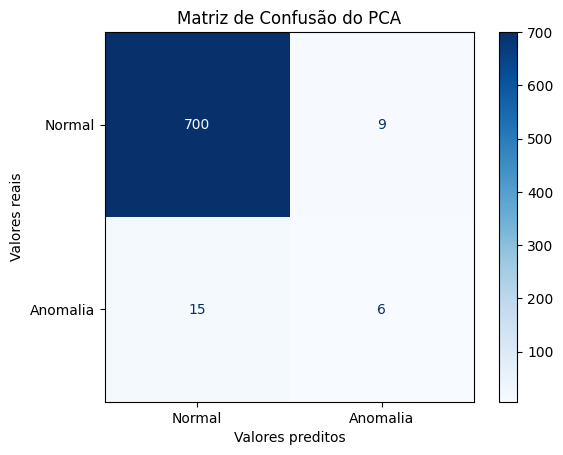

Acurácia=96,71
Precisão=40,00
Recall=28,57
F1=33,33
Falso Negativo=15
Falso Positivo=9
Verdadeiro Positivo=6
Avaliação do modelo PCA com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



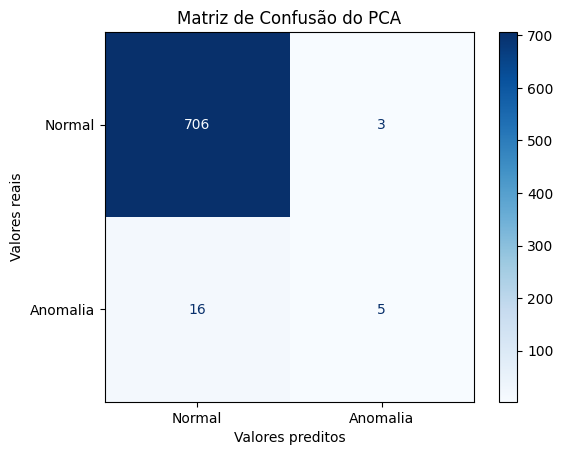

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5
Avaliação do modelo PCA com Recall-Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



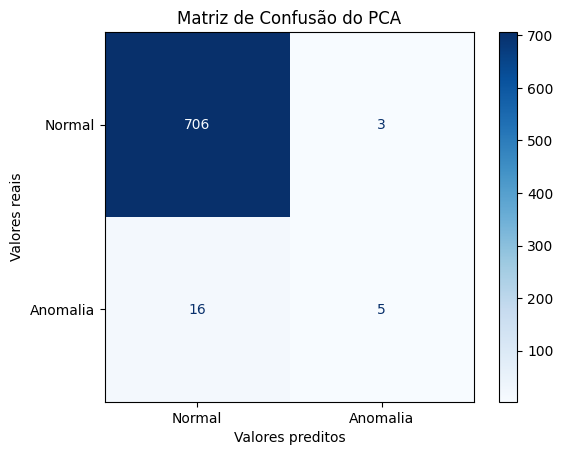

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5


In [4]:
from pyod.models.pca import PCA
# Treinar algoritmo PCA para encontrar melhor contaminação
clf_name = 'PCA'
parametros='n_components=2,n_selected_components=1,'

#################################################################
# Calcula melhor contaminação primeiro com falso negativo depois acurárica
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com acurácia depois com falso negativo 
contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso negativo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo OCSVM:
Contaminação utilizada=0.09
Acurácia=93,84
Precisão=31,82
Recall=100,00
F1=48,28
Falso Negativo=0
Falso Positivo=45
Verdadeiro Positivo=21



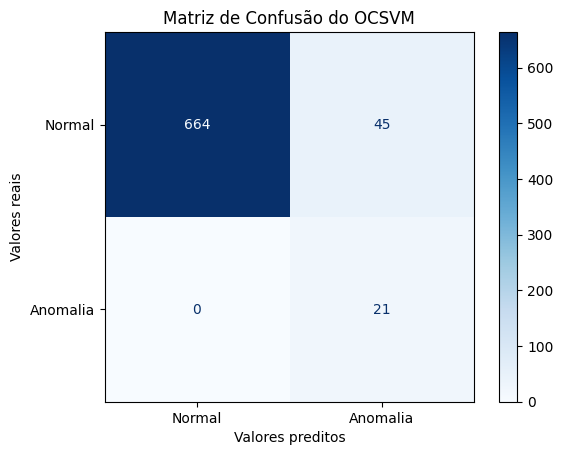

Acurácia=93,84
Precisão=31,82
Recall=100,00
F1=48,28
Falso Negativo=0
Falso Positivo=45
Verdadeiro Positivo=21
Avaliação do modelo OCSVM com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13



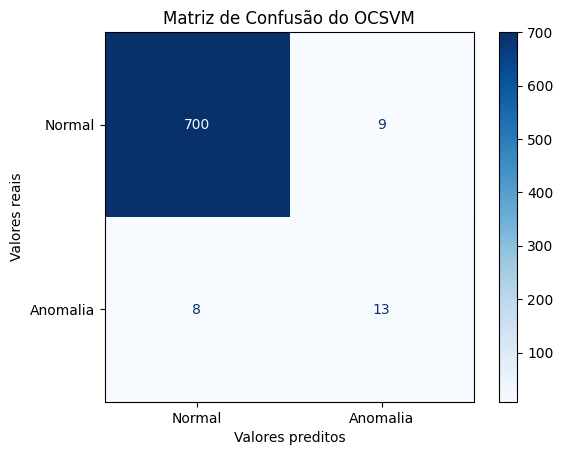

Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13
Avaliação do modelo OCSVM com Recall-Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13



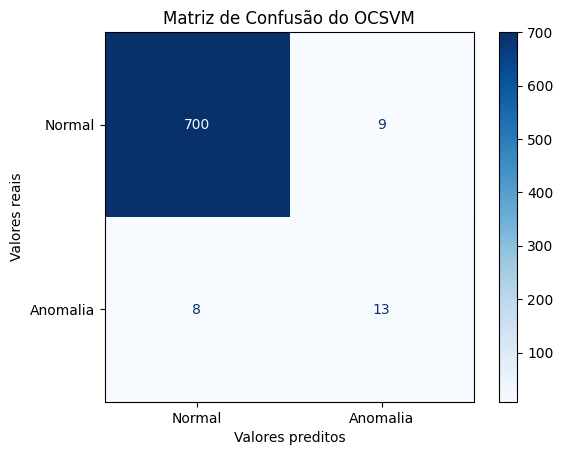

Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13


In [5]:
from pyod.models.ocsvm import OCSVM
# train OCSVM detector
clf_name = 'OCSVM'
parametros=''
contamination=calcula_anomalias(clf_name,'')

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

153
Avaliação do modelo LOF:
Contaminação utilizada=0.03
Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21



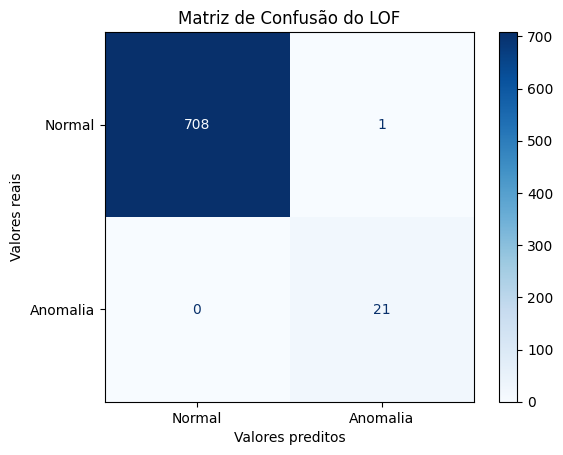

Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21
Avaliação do modelo LOF com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21



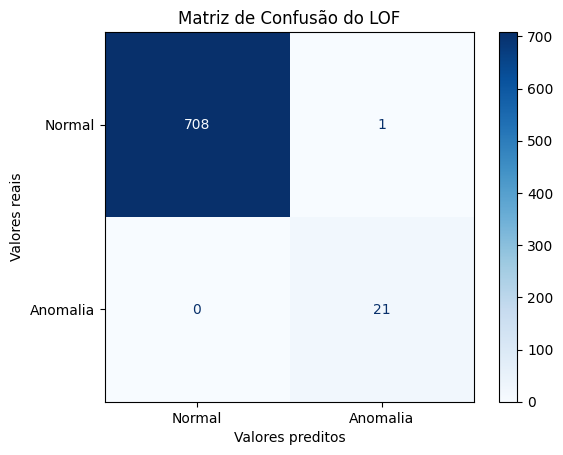

Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21
Avaliação do modelo LOF com Recall-Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21



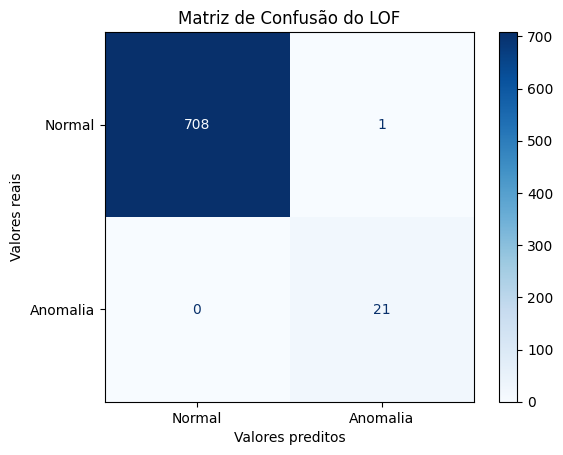

Acurácia=99,86
Precisão=95,45
Recall=100,00
F1=97,67
Falso Negativo=0
Falso Positivo=1
Verdadeiro Positivo=21


In [6]:
from pyod.models.lof import LOF
# train LOF detector
clf_name = 'LOF'
itens = len(X)/2
vizinhos=2
macuracia=0
nv=2
while vizinhos<itens: 
    clf = LOF(n_neighbors=vizinhos,contamination=contamination)
    clf.fit(X)
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)        
    ac=accuracy_score(Y,y_train_pred)
    if ac>macuracia:
        nv=vizinhos
        macuracia=ac
    vizinhos=vizinhos+1

print(nv)    

parametros='n_neighbors='+str(nv)+','
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Avaliação do modelo CBLOF:
Contaminação utilizada=0.060000000000000005


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Acurácia=96,85
Precisão=47,73
Recall=100,00
F1=64,62
Falso Negativo=0
Falso Positivo=23
Verdadeiro Positivo=21



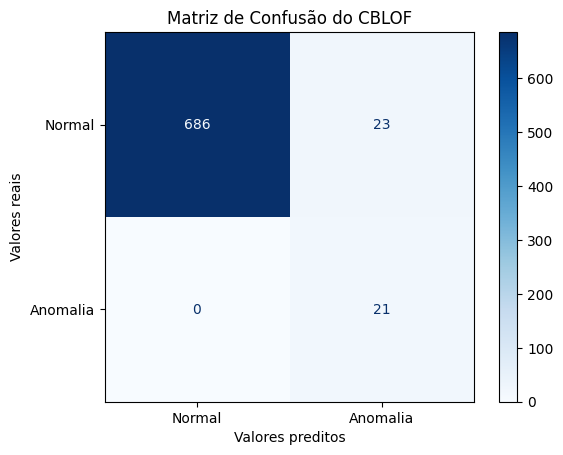

Acurácia=96,85
Precisão=47,73
Recall=100,00
F1=64,62
Falso Negativo=0
Falso Positivo=23
Verdadeiro Positivo=21


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Avaliação do modelo CBLOF com Acurácia-fn:
Contaminação utilizada=0.03


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19



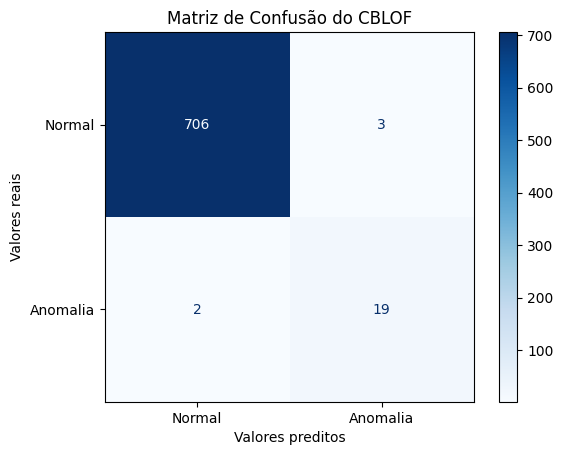

Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Avaliação do modelo CBLOF com Recall-Acurácia-fn:
Contaminação utilizada=0.03


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19



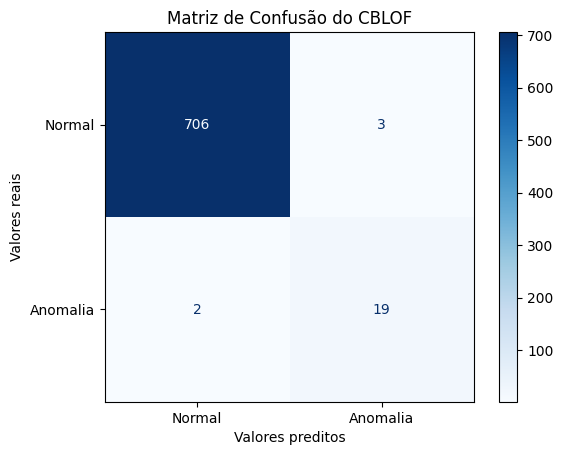

Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19


In [7]:
from pyod.models.cblof import CBLOF
# train CBLOF detector
clf_name = 'CBLOF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COF:
Contaminação utilizada=0.10999999999999999
Acurácia=90,14
Precisão=18,52
Recall=71,43
F1=29,41
Falso Negativo=6
Falso Positivo=66
Verdadeiro Positivo=15



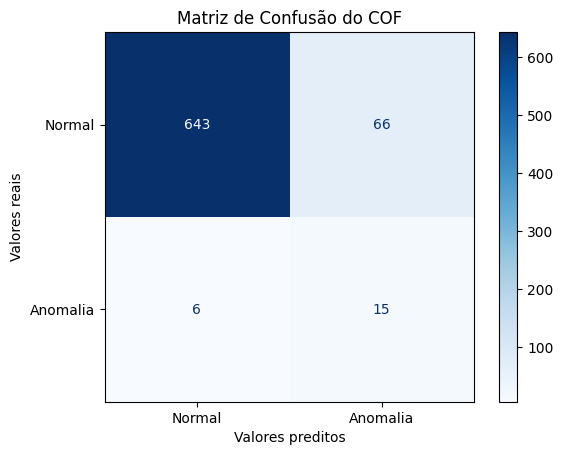

Acurácia=90,14
Precisão=18,52
Recall=71,43
F1=29,41
Falso Negativo=6
Falso Positivo=66
Verdadeiro Positivo=15
Avaliação do modelo COF com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,12
Precisão=50,00
Recall=19,05
F1=27,59
Falso Negativo=17
Falso Positivo=4
Verdadeiro Positivo=4



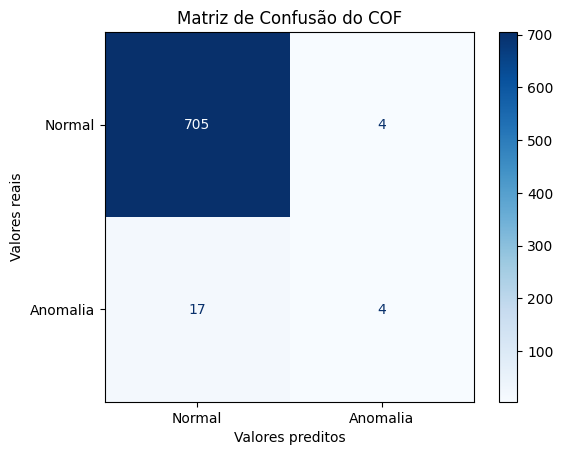

Acurácia=97,12
Precisão=50,00
Recall=19,05
F1=27,59
Falso Negativo=17
Falso Positivo=4
Verdadeiro Positivo=4
Avaliação do modelo COF com Recall-Acurácia-fn:
Contaminação utilizada=0.02
Acurácia=96,71
Precisão=40,00
Recall=28,57
F1=33,33
Falso Negativo=15
Falso Positivo=9
Verdadeiro Positivo=6



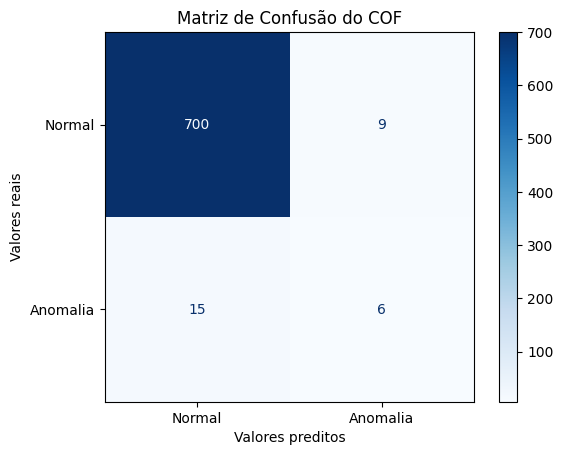

Acurácia=96,71
Precisão=40,00
Recall=28,57
F1=33,33
Falso Negativo=15
Falso Positivo=9
Verdadeiro Positivo=6


In [8]:
from pyod.models.cof import COF
# train COF detector
clf_name = 'COF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo HBOS:
Contaminação utilizada=0.02
Acurácia=95,89
Precisão=15,38
Recall=9,52
F1=11,76
Falso Negativo=19
Falso Positivo=11
Verdadeiro Positivo=2



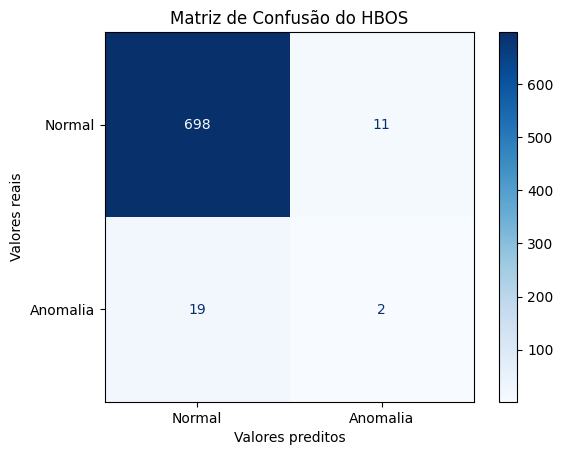

Acurácia=95,89
Precisão=15,38
Recall=9,52
F1=11,76
Falso Negativo=19
Falso Positivo=11
Verdadeiro Positivo=2
Avaliação do modelo HBOS com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=96,30
Precisão=0,00
Recall=0,00
F1=0,00
Falso Negativo=21
Falso Positivo=6
Verdadeiro Positivo=0



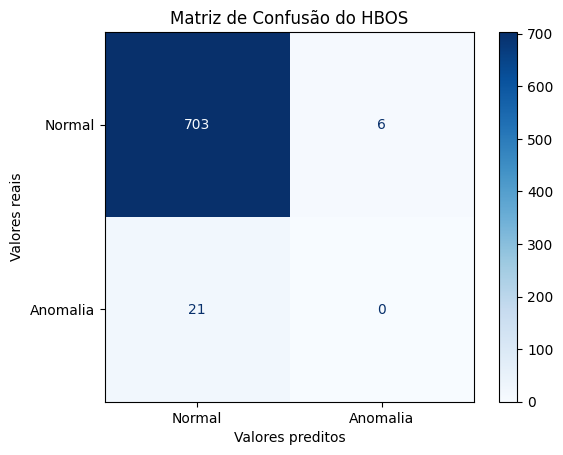

Acurácia=96,30
Precisão=0,00
Recall=0,00
F1=0,00
Falso Negativo=21
Falso Positivo=6
Verdadeiro Positivo=0
Avaliação do modelo HBOS com Recall-Acurácia-fn:
Contaminação utilizada=0.02
Acurácia=95,89
Precisão=15,38
Recall=9,52
F1=11,76
Falso Negativo=19
Falso Positivo=11
Verdadeiro Positivo=2



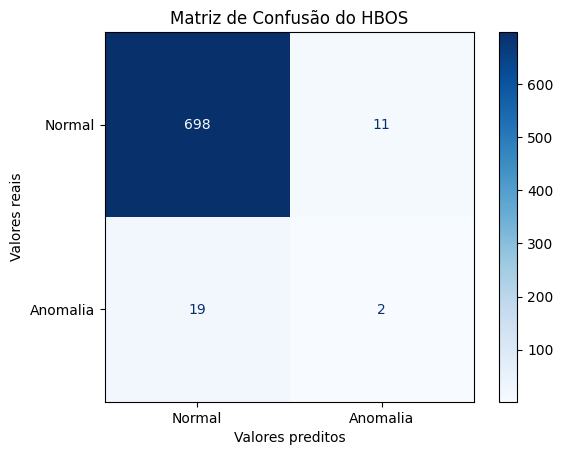

Acurácia=95,89
Precisão=15,38
Recall=9,52
F1=11,76
Falso Negativo=19
Falso Positivo=11
Verdadeiro Positivo=2


In [9]:
from pyod.models.hbos import HBOS

# train HBOS detector
clf_name = 'HBOS'
parametros='n_bins=35, alpha=contamination,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo KNN:
Contaminação utilizada=0.05
Acurácia=97,81
Precisão=56,76
Recall=100,00
F1=72,41
Falso Negativo=0
Falso Positivo=16
Verdadeiro Positivo=21



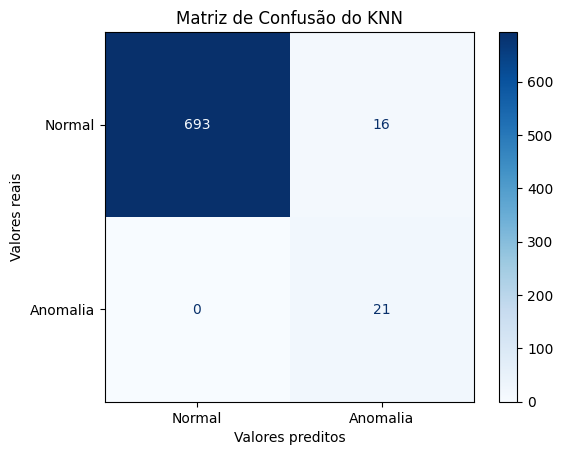

Acurácia=97,81
Precisão=56,76
Recall=100,00
F1=72,41
Falso Negativo=0
Falso Positivo=16
Verdadeiro Positivo=21
Avaliação do modelo KNN com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19



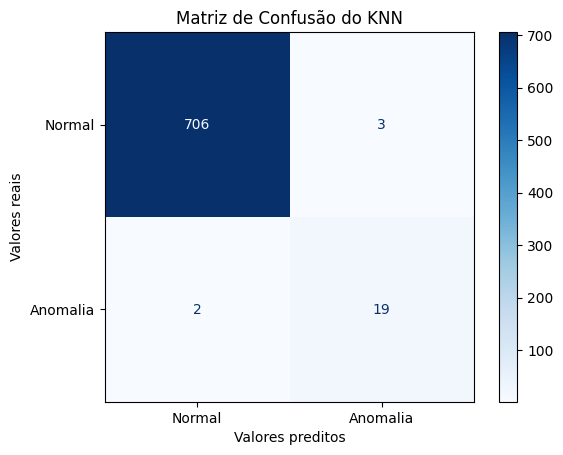

Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19
Avaliação do modelo KNN com Recall-Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19



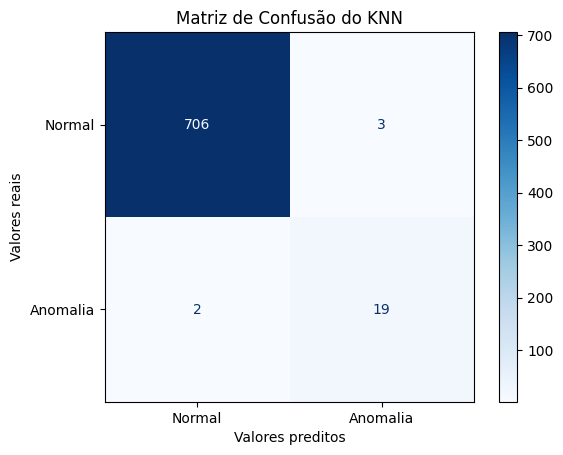

Acurácia=99,32
Precisão=86,36
Recall=90,48
F1=88,37
Falso Negativo=2
Falso Positivo=3
Verdadeiro Positivo=19


In [10]:
from pyod.models.knn import KNN
# train KNN detector
clf_name = 'KNN'
parametros='n_neighbors=35,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo SOD:
Contaminação utilizada=0.13999999999999999
Acurácia=87,67
Precisão=16,50
Recall=80,95
F1=27,42
Falso Negativo=4
Falso Positivo=86
Verdadeiro Positivo=17



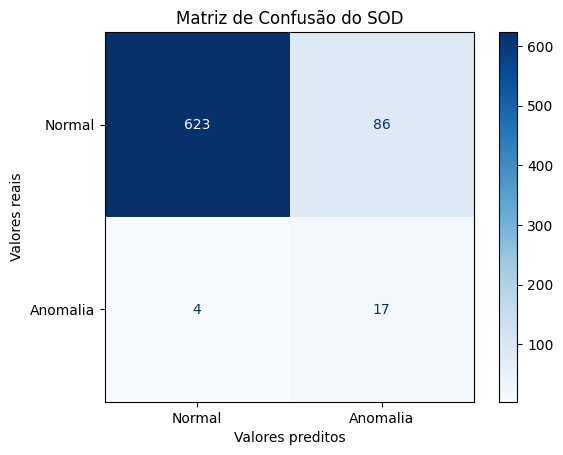

Acurácia=87,67
Precisão=16,50
Recall=80,95
F1=27,42
Falso Negativo=4
Falso Positivo=86
Verdadeiro Positivo=17
Avaliação do modelo SOD com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=96,03
Precisão=0,00
Recall=0,00
F1=0,00
Falso Negativo=21
Falso Positivo=8
Verdadeiro Positivo=0



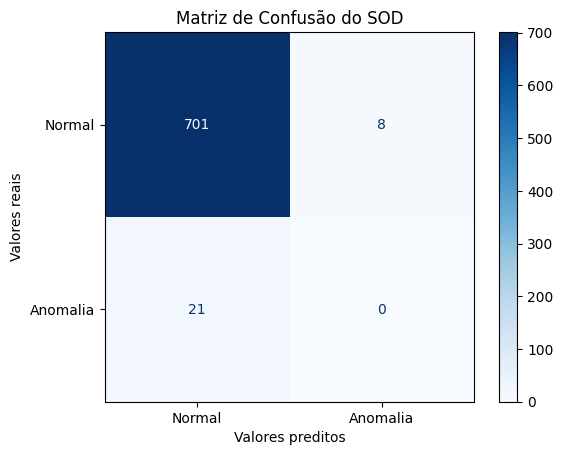

Acurácia=96,03
Precisão=0,00
Recall=0,00
F1=0,00
Falso Negativo=21
Falso Positivo=8
Verdadeiro Positivo=0
Avaliação do modelo SOD com Recall-Acurácia-fn:
Contaminação utilizada=0.12999999999999998
Acurácia=88,49
Precisão=16,84
Recall=76,19
F1=27,59
Falso Negativo=5
Falso Positivo=79
Verdadeiro Positivo=16



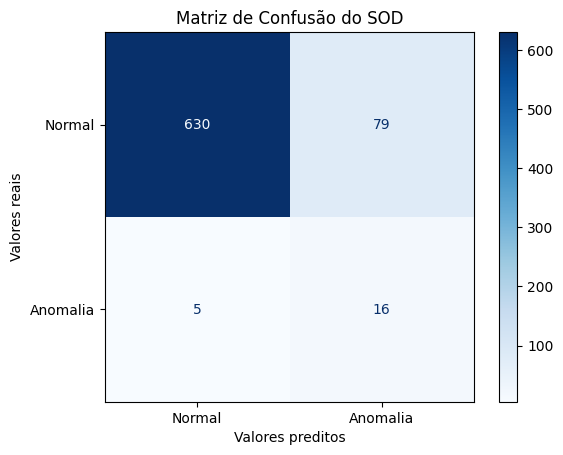

Acurácia=88,49
Precisão=16,84
Recall=76,19
F1=27,59
Falso Negativo=5
Falso Positivo=79
Verdadeiro Positivo=16


In [11]:
from pyod.models.sod import SOD
# train SOD detector
clf_name = 'SOD' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COPOD:
Contaminação utilizada=0.11999999999999998
Acurácia=90,82
Precisão=23,86
Recall=100,00
F1=38,53
Falso Negativo=0
Falso Positivo=67
Verdadeiro Positivo=21



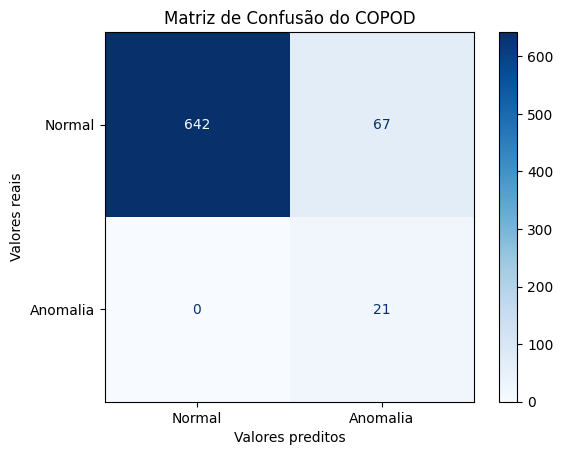

Acurácia=90,82
Precisão=23,86
Recall=100,00
F1=38,53
Falso Negativo=0
Falso Positivo=67
Verdadeiro Positivo=21
Avaliação do modelo COPOD com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



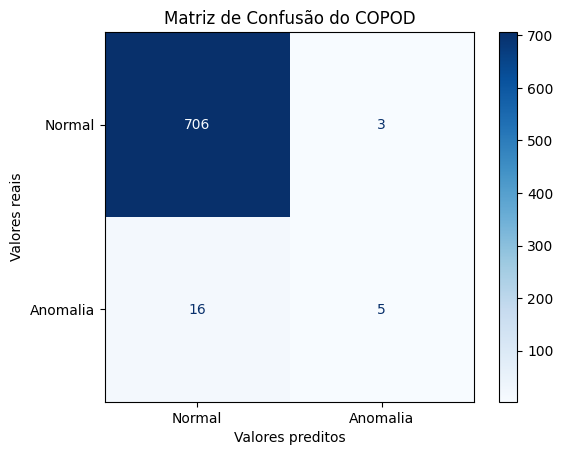

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5
Avaliação do modelo COPOD com Recall-Acurácia-fn:
Contaminação utilizada=0.04
Acurácia=97,12
Precisão=50,00
Recall=71,43
F1=58,82
Falso Negativo=6
Falso Positivo=15
Verdadeiro Positivo=15



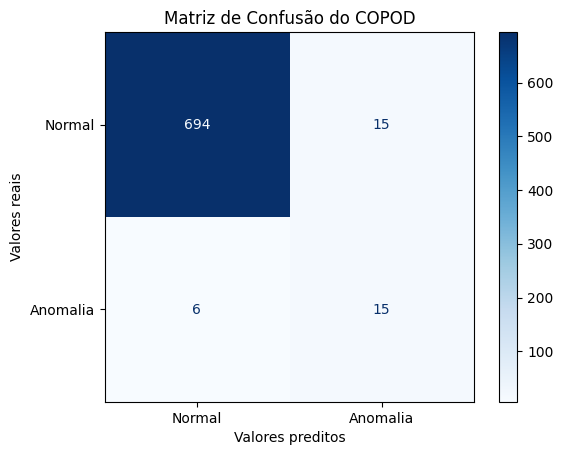

Acurácia=97,12
Precisão=50,00
Recall=71,43
F1=58,82
Falso Negativo=6
Falso Positivo=15
Verdadeiro Positivo=15


In [12]:
from pyod.models.copod import COPOD
# train COPOD detector
clf_name = 'COPOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo ECOD:
Contaminação utilizada=0.09
Acurácia=93,84
Precisão=31,82
Recall=100,00
F1=48,28
Falso Negativo=0
Falso Positivo=45
Verdadeiro Positivo=21



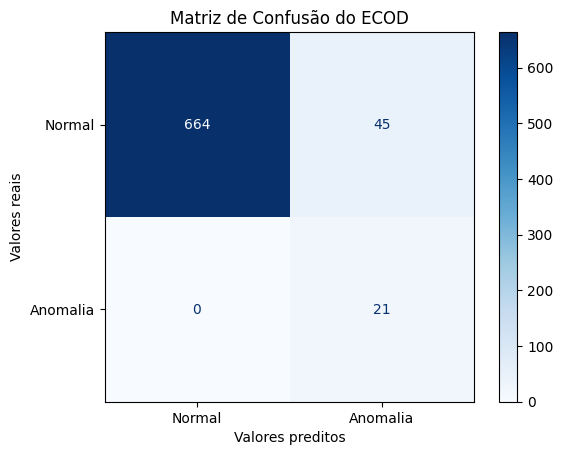

Acurácia=93,84
Precisão=31,82
Recall=100,00
F1=48,28
Falso Negativo=0
Falso Positivo=45
Verdadeiro Positivo=21
Avaliação do modelo ECOD com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13



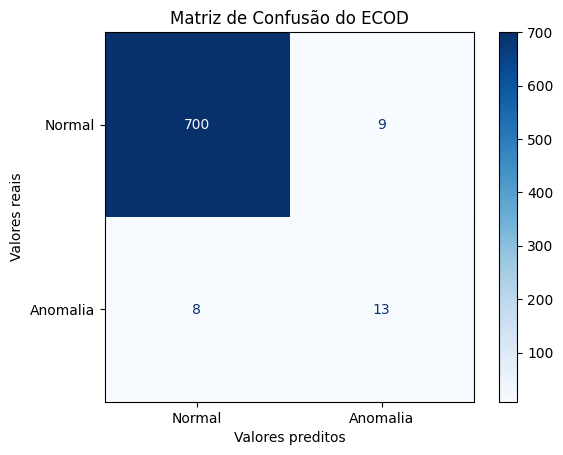

Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13
Avaliação do modelo ECOD com Recall-Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13



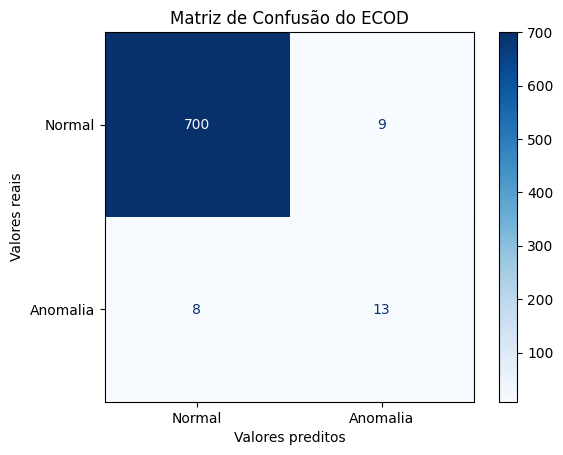

Acurácia=97,67
Precisão=59,09
Recall=61,90
F1=60,47
Falso Negativo=8
Falso Positivo=9
Verdadeiro Positivo=13


In [13]:
from pyod.models.ecod import ECOD
# train ECOD detector
clf_name = 'ECOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo IForest:
Contaminação utilizada=0.060000000000000005
Acurácia=96,30
Precisão=42,86
Recall=85,71
F1=57,14
Falso Negativo=3
Falso Positivo=24
Verdadeiro Positivo=18



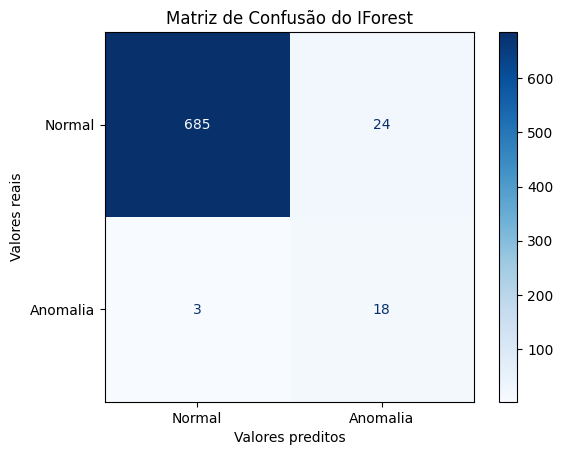

Acurácia=96,30
Precisão=42,86
Recall=85,71
F1=57,14
Falso Negativo=3
Falso Positivo=24
Verdadeiro Positivo=18
Avaliação do modelo IForest com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



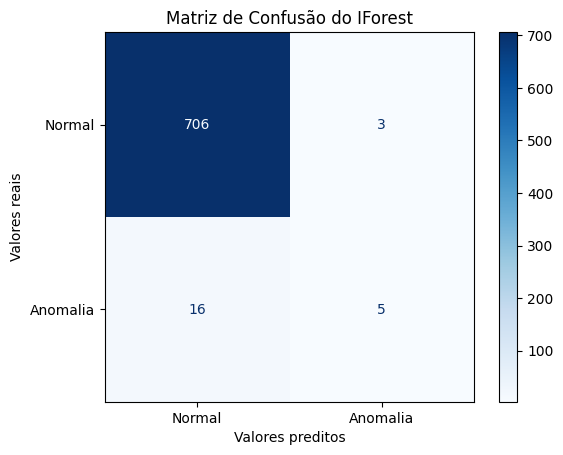

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5
Avaliação do modelo IForest com Recall-Acurácia-fn:
Contaminação utilizada=0.05
Acurácia=97,26
Precisão=51,35
Recall=90,48
F1=65,52
Falso Negativo=2
Falso Positivo=18
Verdadeiro Positivo=19



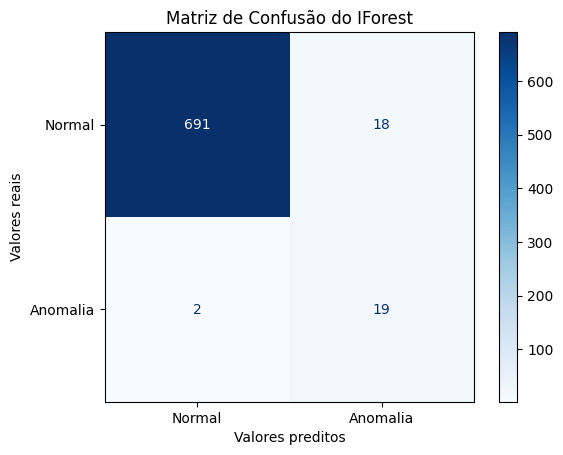

Acurácia=97,26
Precisão=51,35
Recall=90,48
F1=65,52
Falso Negativo=2
Falso Positivo=18
Verdadeiro Positivo=19


In [14]:
from pyod.models.iforest import IForest
# train IForest detector
clf_name = 'IForest'
itens = len(X)
estimadores = len(X)//10
if estimadores<2: estimadores=2

parametros='n_estimators=estimadores,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo LODA:
Contaminação utilizada=0.05
Acurácia=96,99
Precisão=46,15
Recall=28,57
F1=35,29
Falso Negativo=15
Falso Positivo=7
Verdadeiro Positivo=6



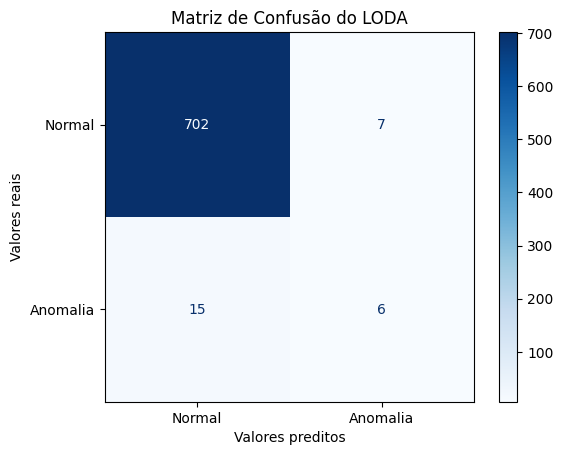

Acurácia=96,99
Precisão=46,15
Recall=28,57
F1=35,29
Falso Negativo=15
Falso Positivo=7
Verdadeiro Positivo=6
Avaliação do modelo LODA com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



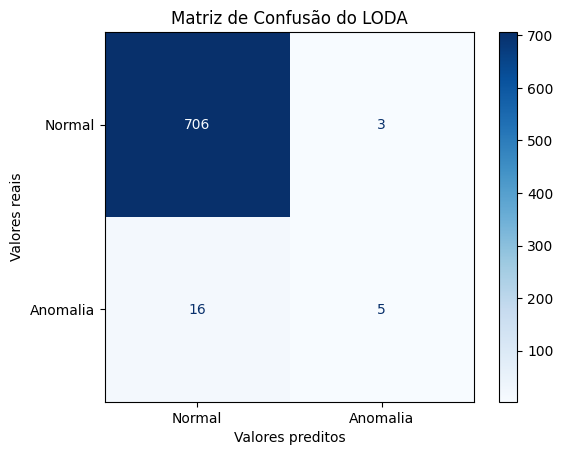

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5
Avaliação do modelo LODA com Recall-Acurácia-fn:
Contaminação utilizada=0.04
Acurácia=95,21
Precisão=26,67
Recall=38,10
F1=31,37
Falso Negativo=13
Falso Positivo=22
Verdadeiro Positivo=8



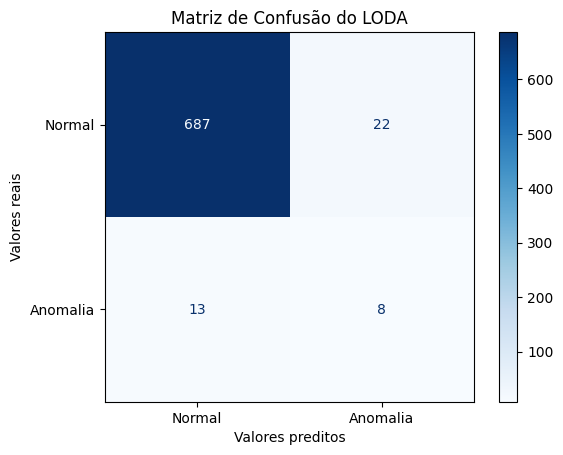

Acurácia=95,21
Precisão=26,67
Recall=38,10
F1=31,37
Falso Negativo=13
Falso Positivo=22
Verdadeiro Positivo=8


In [15]:
from pyod.models.loda import LODA
# train LODA detector
clf_name = 'LODA' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

23/23 [==============================] - 0s 682us/step
Avaliação do modelo DeepSVDD:
Contaminação utilizada=0.15
23/23 [==============================] - 0s 890us/step
Acurácia=87,26
Precisão=17,27
Recall=90,48
F1=29,01
Falso Negativo=2
Falso Positivo=91
Verdadeiro Positivo=19



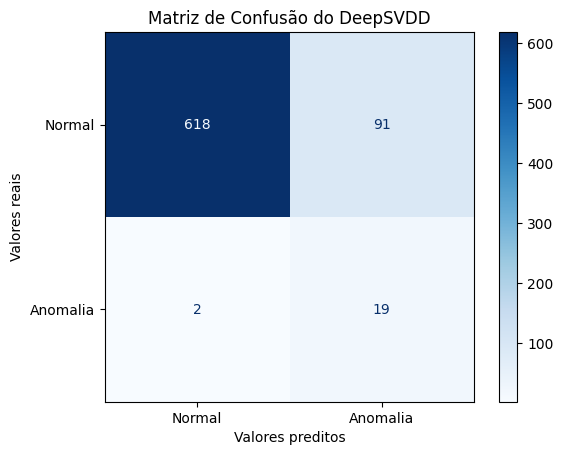

Acurácia=87,26
Precisão=17,27
Recall=90,48
F1=29,01
Falso Negativo=2
Falso Positivo=91
Verdadeiro Positivo=19
23/23 [==============================] - 0s 724us/step
Avaliação do modelo DeepSVDD com Acurácia-fn:
Contaminação utilizada=0.03
23/23 [==============================] - 0s 857us/step
Acurácia=97,12
Precisão=50,00
Recall=52,38
F1=51,16
Falso Negativo=10
Falso Positivo=11
Verdadeiro Positivo=11



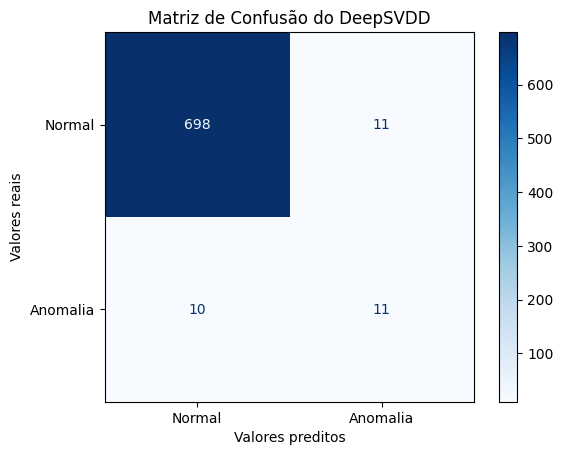

Acurácia=97,12
Precisão=50,00
Recall=52,38
F1=51,16
Falso Negativo=10
Falso Positivo=11
Verdadeiro Positivo=11
23/23 [==============================] - 0s 1ms/step
Avaliação do modelo DeepSVDD com Recall-Acurácia-fn:
Contaminação utilizada=0.05
23/23 [==============================] - 0s 591us/step
Acurácia=97,53
Precisão=54,05
Recall=95,24
F1=68,97
Falso Negativo=1
Falso Positivo=17
Verdadeiro Positivo=20



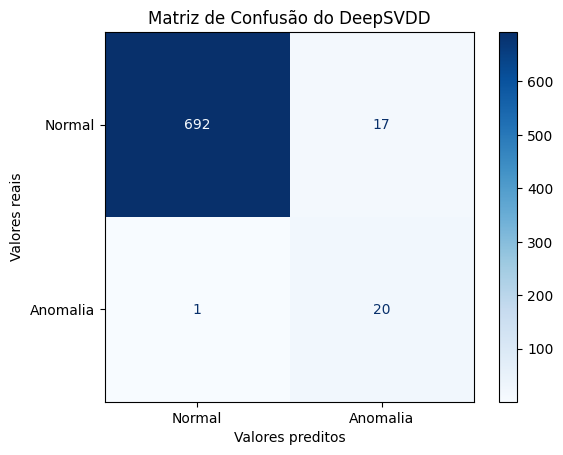

Acurácia=97,53
Precisão=54,05
Recall=95,24
F1=68,97
Falso Negativo=1
Falso Positivo=17
Verdadeiro Positivo=20


In [16]:
from pyod.models.deep_svdd import DeepSVDD
# train DeepSVDD detector
clf_name = 'DeepSVDD'
parametros='verbose=0,preprocessing=True,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Avaliação do modelo GMM:
Contaminação utilizada=0.09999999999999999
Acurácia=91,51
Precisão=21,92
Recall=76,19
F1=34,04
Falso Negativo=5
Falso Positivo=57
Verdadeiro Positivo=16



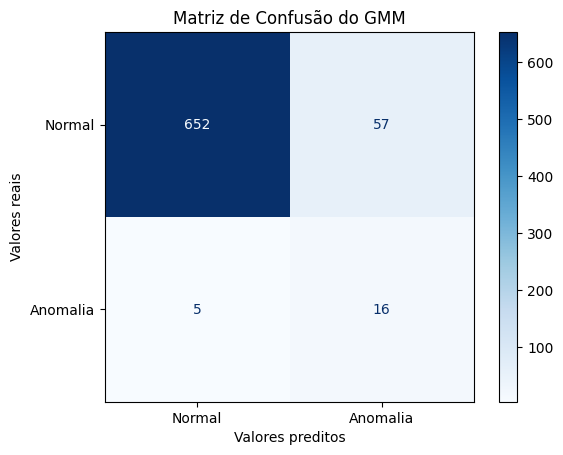

Acurácia=91,51
Precisão=21,92
Recall=76,19
F1=34,04
Falso Negativo=5
Falso Positivo=57
Verdadeiro Positivo=16


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Avaliação do modelo GMM com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



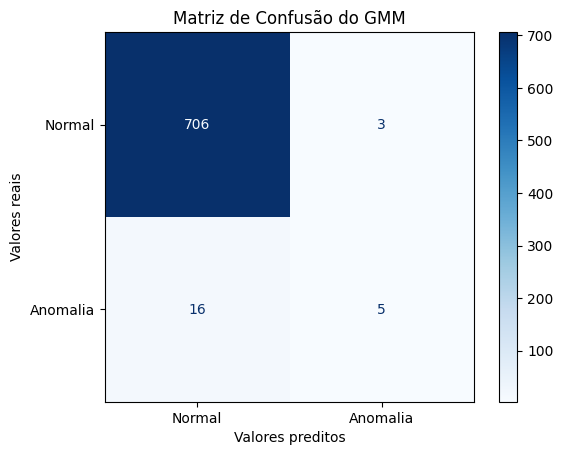

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Avaliação do modelo GMM com Recall-Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5



C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


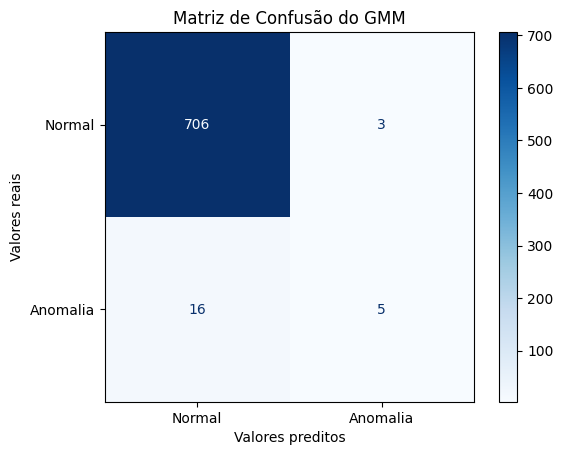

Acurácia=97,40
Precisão=62,50
Recall=23,81
F1=34,48
Falso Negativo=16
Falso Positivo=3
Verdadeiro Positivo=5


In [17]:
from pyod.models.gmm import GMM
# train GMM detector
clf_name = 'GMM' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [18]:
tabelafinal.sort_values("fn", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
print(tabelafinal)

   algoritmo contaminacao acuracia precisao  recall     f1  fn  fp  tp
1      OCSVM         0,09    93,84    31,82  100,00  48,28   0  45  21
2        LOF         0,03    99,86    95,45  100,00  97,67   0   1  21
3      CBLOF         0,06    96,85    47,73  100,00  64,62   0  23  21
6        KNN         0,05    97,81    56,76  100,00  72,41   0  16  21
8      COPOD         0,12    90,82    23,86  100,00  38,53   0  67  21
9       ECOD         0,09    93,84    31,82  100,00  48,28   0  45  21
12  DeepSVDD         0,15    87,26    17,27   90,48  29,01   2  91  19
10   IForest         0,06    96,30    42,86   85,71  57,14   3  24  18
7        SOD         0,14    87,67    16,50   80,95  27,42   4  86  17
13       GMM          0,1    91,51    21,92   76,19  34,04   5  57  16
4        COF         0,11    90,14    18,52   71,43  29,41   6  66  15
0        PCA         0,02    96,71    40,00   28,57  33,33  15   9   6
11      LODA         0,05    96,99    46,15   28,57  35,29  15   7   6
5     

In [19]:
novatabelafinal.sort_values("fn", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
print(novatabelafinal)

   algoritmo contaminacao acuracia precisao  recall     f1  fn  fp  tp
3        LOF         0,03    99,86    95,45  100,00  97,67   0   1  21
4      CBLOF         0,03    99,32    86,36   90,48  88,37   2   3  19
7        KNN         0,03    99,32    86,36   90,48  88,37   2   3  19
2      OCSVM         0,03    97,67    59,09   61,90  60,47   8   9  13
10      ECOD         0,03    97,67    59,09   61,90  60,47   8   9  13
13  DeepSVDD         0,03    97,12    50,00   52,38  51,16  10  11  11
1        PCA         0,01    97,40    62,50   23,81  34,48  16   3   5
9      COPOD         0,01    97,40    62,50   23,81  34,48  16   3   5
11   IForest         0,01    97,40    62,50   23,81  34,48  16   3   5
12      LODA         0,01    97,40    62,50   23,81  34,48  16   3   5
14       GMM         0,01    97,40    62,50   23,81  34,48  16   3   5
5        COF         0,01    97,12    50,00   19,05  27,59  17   4   4
6       HBOS         0,01    96,30     0,00    0,00   0,00  21   6   0
8     

In [20]:
tabelafinalrecall.sort_values("fn", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
print(tabelafinalrecall)

   algoritmo contaminacao acuracia precisao  recall     f1  fn  fp  tp
3        LOF         0,03    99,86    95,45  100,00  97,67   0   1  21
13  DeepSVDD         0,05    97,53    54,05   95,24  68,97   1  17  20
4      CBLOF         0,03    99,32    86,36   90,48  88,37   2   3  19
7        KNN         0,03    99,32    86,36   90,48  88,37   2   3  19
11   IForest         0,05    97,26    51,35   90,48  65,52   2  18  19
8        SOD         0,13    88,49    16,84   76,19  27,59   5  79  16
9      COPOD         0,04    97,12    50,00   71,43  58,82   6  15  15
2      OCSVM         0,03    97,67    59,09   61,90  60,47   8   9  13
10      ECOD         0,03    97,67    59,09   61,90  60,47   8   9  13
12      LODA         0,04    95,21    26,67   38,10  31,37  13  22   8
5        COF         0,02    96,71    40,00   28,57  33,33  15   9   6
1        PCA         0,01    97,40    62,50   23,81  34,48  16   3   5
14       GMM         0,01    97,40    62,50   23,81  34,48  16   3   5
6     